## REI602M Machine Learning - Homework 7
### Due: *Thursday* 11.3.2021

**Objectives**: Image processing with $k$-means, the PagaRank algorithm and feedforward neural networks.

**Name**: Alexander Guðmundsson, **email: ** alg35@hi.is, **collaborators:** (if any)

Please provide your solutions by filling in the appropriate cells in this notebook, creating new cells as needed. Hand in your solution on Gradescope, taking care to locate the appropriate page numbers in the PDF document. Make sure that you are familiar with the course rules on collaboration (encouraged) and copying (very, very, bad).

### 1\. [Image processing with $k$-means, 40 points]

a) [30 points] Here you  apply the $k$-means algorithm to lossy image compression, by reducing the number of colors used in an image. This part of the assignment comes from Andrew Ng's CS229 course at Stanford.

You will be using the files `mandrill-small.png` and `mandrill-large.png`. The `mandrill-large.png` file contains a 512x512 image of a mandrill represented in 24-bit color. This means that, for each of the 262144 pixels in the image, there are three 8-bit numbers (each ranging from 0 to 255) that represent the red, green, and blue intensity values for that pixel. The straightforward representation of this image therefore takes about 262144×3 = 786432 bytes (a byte being 8 bits). To compress the image, we will use $k$-means to reduce the image to $k = 16$ colors. More specifically, each pixel in the image is considered a point in the three-dimensional $(r, g, b)$-space. To compress the image, we will cluster these points in color-space into 16 clusters, and replace each pixel with the closest cluster centroid.

Follow the instructions below.

To load the image, type
```python
   from matplotlib.image import imread.
   import matplotlib.pyplot as plt
   A = imread('mandrill-large.png')```

Now, `A` is a "three dimensional" matrix, and `A[:,:,0]`, `A[:,:,1]` and `A[:,:,2]` are $512 \times 512$ arrays that respectively contain the red, green and blue values for each pixel. To display the image, enter
```python
   plt.imshow(A);
   plt.show() to display the image```

Note: The `imshow` function expects the red, green and blue values to be between 0 and 1. Some file formats such as tiff use integer values between 0 and 255 and in this case you would have to scale all  $(R,G,B)$ values by dividing by 255, otherwise you may end up with incorrect color scheme in the reconstructed image.

Since the large image has 262144 pixels and would take a while to cluster, we will instead run vector quantization on a smaller image. Repeat the above with `mandrill-small.png`. Treating each pixel’s $(r, g, b)$ values as an element of $R^3$. Run $k$-means with 16 clusters on the pixel data from this smaller image.

Take the matrix `A` from `mandrill-large.png`, and replace each pixel’s $(r, g, b)$ values with the value of the closest cluster centroid. Display the new image, and compare it visually to the original image.

If we represent the image with these reduced (16) colors, by (approximately) what factor have we compressed the image?

*Comment*: Use the $k$-means implementation in `sklearn.cluster.KMeans`.

small image original


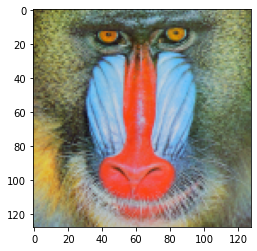

big image original


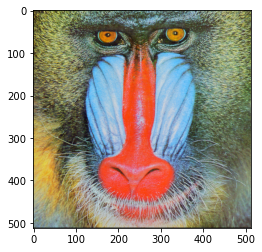

small image with 18 colors


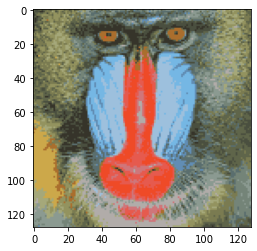

(262144, 4)
big image with 18 colors


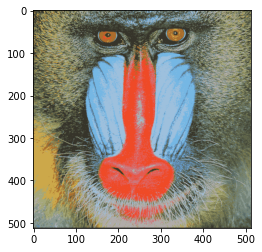

In [2]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


#Importing images
big_img = imread('mandrill-large.png')
small_img = imread('mandrill-small.png')

k = 18 #number of clusters


X_small = small_img[:,:]*255 #change from [0..1] to rbga [0..255]
X_small = X_small.astype(int)
X_big = big_img[:,:]*255
X_big = X_big.astype(int)

print("small image original")
plt.imshow(X_small) #show original small image
plt.show()

print("big image original")
plt.imshow(X_big)
plt.show()


X_small = X_small.reshape(len(X_small)*len(X_small[0]), len(X_small[0,0])) #reshape to array of rbga vector


#Using kmeans we cluster the image to 18 colors, then we find the closest centroids of X_small
kmeans = KMeans(n_clusters = k)
kmeans.fit(X_small)
l = kmeans.labels_
c = kmeans.cluster_centers_
c = c.astype(int)

X_small_new = np.ones(len(X_small)*len(X_small[0])).reshape(len(X_small),len(X_small[0])) #image with 18 colors 


for i in range(len(l)):
    X_small_new[i] = c[l[i]]

X_small_new = X_small_new.astype(int)
X_small_new = X_small_new.reshape((128,128,4))
print("small image with 18 colors")
plt.imshow(X_small_new) #plotting the new small image with 18 colors
plt.show()


#Let's predict the colors of the big image from the small image
X_big = X_big.reshape(len(X_big)*len(X_big[0]), len(X_big[0,0]))
l_big = kmeans.predict(X_big)
X_big_new = np.ones(len(X_big)*len(X_big[0])).reshape(len(X_big),len(X_big[0])) #image with 18 colors 


for i in range(len(l_big)):
    X_big_new[i] = c[l_big[i]]

print(X_big_new.shape)
X_big_new = X_big_new.reshape((512,512,4))
X_big_new = X_big_new.astype(int)
print("big image with 18 colors")
plt.imshow(X_big_new) #plotting the new small image with 18 colors
plt.show()


b) [10 points] Building upon your work in a), write a function that uses $k$-means clustering to identify representative colors in an image, and creates a new image highlighting the colors. The result could e.g. look as follows.

<img src="./napoleon.png" width="200">

Run your code on one or more images of your choosing (non-offensive please!) and report the results.

*Comments:*

1) The following links may be useful
https://stackoverflow.com/questions/37435369/matplotlib-how-to-draw-a-rectangle-on-image/37437395 and
https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html

2) It takes a long time to run $k$-means on a high-resolution image. Running $k$-means on a downscaled version should work reasonably well. If anti-aliasing is a problem, you can try the rescale feature in scikit-image, instead of simply discarding pixels,
https://scikit-image.org/docs/stable/auto_examples/transform/plot_rescale.html

original windows landscape image with resolution of 1920,1200


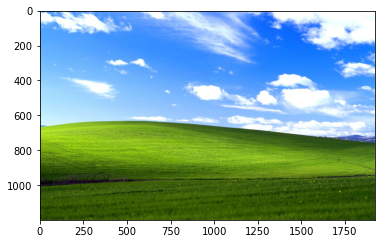

scaled windows landscape image with resolution of 622,389


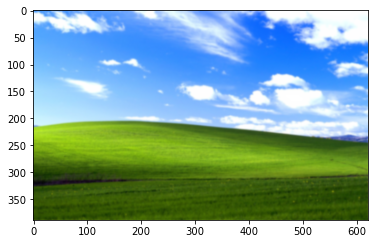

colors image with resolution of 700,420


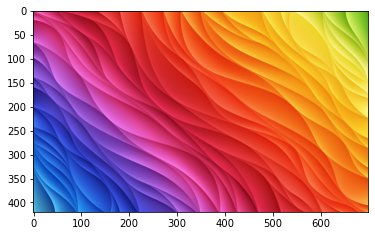

scaled colors image with resolution of 632,379


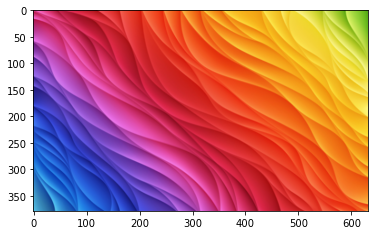

(241958, 3)
KMeans(n_clusters=5)
(241958,)
(5, 3)
(241958, 3)
(239528, 3)
KMeans(n_clusters=5)
(239528,)
(5, 3)
(239528, 3)
scaled windows landscape with 5 colors and resolution of 622,389


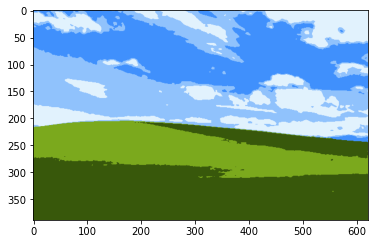

original windows landscape with 5 colors and resolution of 1920,1200


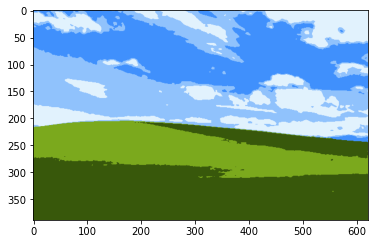

scaled colors image with 5 colors and resolution of 632,379


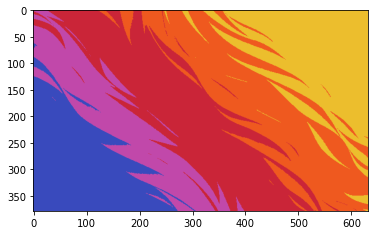

colors image with 5 colors and resolution of 700,420


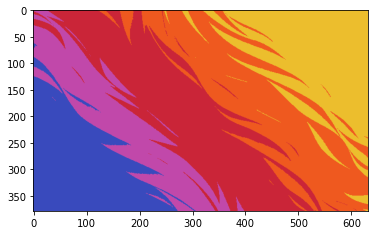

In [25]:
from skimage.transform import rescale, resize, downscale_local_mean

#input: Img Array H x W x 3 and max_value of pixels for scaling
#returns: img array H x W x 3 scaled so It's less than max_value
def img_scale(img , max_value = 262144):
    height = len(img)
    width = len(img[0])
    if width*height > max_value:
        return img_scale(rescale(img,0.95))
    else:
        return img


def identify_colors(A, ncolors=5, model = None):
    height = len(A)
    width = len(A[0])
    
    A = A.reshape(len(A)*len(A[0]), len(A[0,0])) #reshape to array of rbga vector    B = np.zeros((len(A), len(A[0]))) # You may want to modify the size of the returned image    
    B = np.zeros((len(A), len(A[0]))) # You may want to modify the size of the returned image
    
    if model:
        print(model)
        #Let's predict the colors of the big image from the small image
        l = model.predict(A)
        c = model.cluster_centers_
        print(l.shape)
        print(c.shape)
        
    else:
        #Using kmeans we cluster the image to <ncolors> colors, then we find the closest centroids of X_small
        model = KMeans(n_clusters = ncolors)
        model.fit(A)
        l = model.labels_
        c = model.cluster_centers_
    print(l.shape)
    print(c.shape
    print(B.shape)
    for i in range(len(l)):
        B[i] = c[l[i]]

    B = B.reshape(height,width,3)
    return B,model,ncolors


#Importing images
windows = imread('windows.jpg')
colors = imread('colors.jpg')

#scale images
windows_scaled = img_scale(windows)
colors_scaled = img_scale(colors)



#original windows
print('original windows landscape image with resolution of %s,%s' %(len(windows[0]),len(windows)))
plt.imshow(windows) #show original small image
plt.show()

#scaled windows
print('scaled windows landscape image with resolution of %d,%d' %(len(windows_scaled[0]),len(windows_scaled)))
plt.imshow(windows_scaled) #show original small image
plt.show()
      
#original colors
print('colors image with resolution of %d,%d' %(len(colors[0]),len(colors)))
plt.imshow(colors)
plt.show()

#scaled colors
print('scaled colors image with resolution of %d,%d' %(len(colors_scaled[0]),len(colors_scaled)))
plt.imshow(colors_scaled)
plt.show()

#now we perform k-means clustering

#let's first create each array
A_windows_small, windows_model,n = identify_colors(windows_scaled)
A_windows_big, windows_model,n = identify_colors(A_windows_small,model=windows_model)
A_colors_small, colors_model,n = identify_colors(colors_scaled)
A_colors_big, colors_model,n = identify_colors(A_colors_small,model=colors_model)

#draw the images

#scaled windows
print('scaled windows landscape with %d colors and resolution of %d,%d' %(n,len(windows_scaled[0]),len(windows_scaled)))
plt.imshow(A_windows_small) #show original small image
plt.show()

#original windows
print('original windows landscape with %d colors and resolution of %s,%s' %(n,len(windows[0]),len(windows)))
plt.imshow(A_windows_big) #show original small image
plt.show()

#scaled colors
print('scaled colors image with %d colors and resolution of %d,%d' %(n,len(colors_scaled[0]),len(colors_scaled)))
plt.imshow(A_colors_small)
plt.show()

#original colors
print('colors image with %d colors and resolution of %d,%d' %(n,len(colors[0]),len(colors)))
plt.imshow(A_colors_big)
plt.show()



### 2\. [Ranking web pages, 30 points]
Here we consider algorithms for assigning importance values to web pages. Define the importance $r_i$ of page $i$ as the sum of the importances of the pages linking to $i$,
$$
r_i = \sum_{j \in I_i} r_j / N_j.
$$
Here $I_i$ is the set of pages that link to $i$ and $N_j$ is the number of outlinks from page $j$. The factor $1/N_j$ corresponds to the importance being distributed evenely amongst outlinks.

The web is represented by a graph where nodes represent web pages and directed edges represent hyperlinks. Let $Q_{ij}=1/N_j$ if there is a link from page $j$ to page $i$ and zero otherwise. In the *random surfer* model of web browsing, a surfer clicks on links uniformly at random. In this case element $Q_{ij}$ corresponds to the probability that the random surfer moves from page $j$ to page $i$.

The above equation can be written in matrix form as
$$
Qr = r.
$$
The importance vector $r$ is therefore the eigenvector of $Q$ corresponding to eigenvalue $\lambda=1$ (provided that the matrix actually has such an eigenvalue).

Pages with no outlinks ("dangling links") present a problem since a surfer can get stuck on such page. To remedy this situation, the surfer is assumed to select a web page at random when she encounters a dangling link. This leads to a modified eigenvalue problem
$$
Pr = r
$$
where
$$
P=Q+(1/n)ed^T
$$
and $e$ denotes a vector of ones, i.e. $e=(1,\ldots,1)$, and $d_j=1$ if $N_j=0$ but $d_j=0$ otherwise. This amounts replacing all-zero columns of $Q$ with columns where all entries are equal to $1/n$.

a) [FlawedRank, 10 points] Consider the following graph.

<img src="toy_web.png" width="200">

Construct $Q$ and $P$ for the above graph (see note 1) and compute eigenvector $r$ of $P$ that corresponds to eigenvalue $\lambda=1$ (see notes 2 and 3). Report matrices $Q$ and $P$ and the vector $r$ and discuss the solution briefly (in terms of $r_i$).

*Comments*:

1) The graph is provided in the file `toy_web.txt`. A link from $i$ to $j$ is denoted by `i,j` in the file.

2) Use `scipy.linalg.eig` to solve the eigenvalue problem. The eigenvectors are stored in the columns of the returned matrix. Since $P$ is not symmetric, the eigenvalues are complex numbers. Look for an eigenvalue that is close to $\lambda=1$ (you can use the numpy.real function to extract the real component of a complex number) and the corresponding *right* eigenvector. NB If you get negative values, simply multiply the vector by -1.

3) It can be shown that for matrix $P$, the eigenvectors may be nonunique, i.e. multiple eigenvectors exist for $\lambda=1$ (that differ not only by constant scaling).

b) [PageRank, 10 points] The PageRank algorithm is based on the random surfer model above with the addition of random jumps. The surfer now jumps to a page at random with probability $1-\alpha$, $0 < \alpha < 1$ but with probability $\alpha$ she selects a (random) outlink as before. A random jump is somewhat similar to a surfer entering a (random) address into the address bar of her browser once in a while.

The eigenvalue problem becomes
$$
Ar = r
$$
where $A=\alpha P + (1-\alpha)(1/n)ee^T$.

It can be shown that the matrix $A$ has $\lambda=1$ as the largest eigenvalue. In this case the eigenvector can be computed efficiently using a method called *power iteration*,

Iterate $k=1,2,\ldots$

$\quad q^{(k)} = Ar^{(k-1)}$

$\quad r^{(k)}=q^{(k)} / ||q^{(k)}||_1$

until $||r^{(k)} - r^{(k-1)}|| < \epsilon $.

Implement the power method above and compute $r$ using $\alpha=0.85$, $\epsilon=10^{-4}$ and starting from $r^{0}=(1/n)e$.

Report the matrix $A$ and vector $r$. How does this solution differ from the one you found in a)? Discuss in terms of rankings (ordering of pages), rather than importance values.

c) [PageRank manipulation, 10 points] Search engine optimization refers to the process of increasing traffic to a web site by improving its standing in search engine rankings. In the early days of the search engine revolution this could simply be done with "link farms", a large collection of (dummy) web pages which all linked to a single web page. A significant increase in the number of inlinks for a given page would bolster its rankings. Here we study whether the PageRank algorithm is vulnerable to such manipulation by attempting to boost the standings of page 6.

Add 10 new pages to the web in b) so that page 2 links to all of them and they all link to page 6. Compute the PageRank vector $r$ and compare the rankings with the results you got in b). Does this appear to be a reasonable strategy to boost the PageRank of a web page?

### 3\. [Neural networks, 30 points]
Let $X=\{(x^{(1)}, \ldots, x^{(n)}\}$ be a dataset of $n$ samples with 2-dimensional features, i.e. $x^{(i)} \in R^2$, that are classified into two categories with labels $ y \in \{0,1\}$. The data set is shown below.

<img src="./prob3data.png" width="300">

The examples in class 1 are marked as "x" and examples in class 0 are marked as "0". The task is to perform binary classification using a simple neural network with the architecure shown below.

<img src="./prob3network.png" width="200">

Denote the two features $x_1$ and $x_2$, the three neurons in the hidden layer, $h_1,~h_2,~h_3$, and the output neuron as $o$. Let the weight from $x_i$ to $h_j$ be $w_{i,j}^{[1]}$ for $i\in\{1,2\},~j \in \{1,2,3\}$, and the weight from $h_j$ to $o$ be $w_j^{[2]}$. Finally denote the intercept weight for $h_j$ as $w_{0,j}^{[1]}$ and the intercept weight for $o$ as $w_{0}^{[2]}$. The averaged squared loss will be used as a loss function, instead of the usual negative log-likelihood,
$$
\ell = \frac{1}{n} \sum_{i=1}^n(o^{(i)} - y^{(i)})^2
$$
where $o^{(i)}$ is the result of the output neuron for example $i$.

a) [10 points] Suppose that the sigmoid function is used as the activation function for $h_1,~h_2,~h_3$ and $o$. What is the gradient descent update to $w_{1,2}^{[1]}$ assuming that a learning rate of $\alpha$ is used? Your answer should be written in terms of $x^{(i)},~o^{(i)},y^{(i)}$ and the weights. (There is no need to use LaTeX for the formula, a photo of a handwritten solution is fine).

**Answer**:

b) [10 points] Now, suppose instead of using the sigmoid function for the activation function for $h_1,~h_2,h_3$ and $o$, the step function $f(x)$ is used instead, defined as
$$
f(x) = \left\{ \begin{array}{cc} 1&x \geq 0 \\ 0&x < 0 \end{array} \right.
$$

What is one set of weights that would allow the neural network to classify this dataset with 100% accuracy? Please specify a value for the weights in the order given below and explain your reasoning.
$$
w_{0,1}^{[1]} = ?,~ w_{1,1}^{[1]} = ?,~w_{2,1}^{[1]} = ?
$$
$$
w_{0,2}^{[1]} = ?,~ w_{1,2}^{[1]} = ?,~w_{2,2}^{[1]} = ?
$$
$$
w_{0,3}^{[1]} = ?,~ w_{1,3}^{[1]} = ?,~w_{2,3}^{[1]} = ?
$$
$$
w_{0}^{[2]} = ?,~ w_{1}^{[2]} = ?,~w_{2}^{[2]} = ?,~~w_{3}^{[2]} = ?
$$

*Hint*: There are three sides to a triangle, and there are three neurons in the hidden layer.

**Answer**:

c) [10 points] Let the activation functions for $h_1,~h_2,~h_3$ be the linear function $f(x)=x$ and the activation function for $o$ be the same step function as before. Is there a specific set of weights that will make the loss 0? If yes, please explicitly state a value for every weight. If not, please explain your reasoning.

**Answer**: